In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

IRSEM = pd.read_csv('../data/IRSEM_Results.csv')
URSSI = pd.read_csv('../data/URSSI_survey_anonymized20210930.csv')

• Remove empty columns & rows

• Test loading results based on question numbers

• Make bar graphs for each question in set, divide by section

QUESTION FORMAT: Qa.b_c where a is the section (starting at 0), b is the question, and c is the subquestion

note some Qa.b.d_c - might need to rename/fix 

• summarize results from text inputs - them

• old survey - probably direct counts on the graphs

• my survey - do comparison bar graphs out of 100%

t test data

In [26]:
#def set_questions(survey):
#    return [('Unit', survey["Q0.1"][2:])]
#set_questions(IRSEM)
def print_question(question, survey = 0): # eg "Q0.1"
    if (survey == 0 or survey == 1):
        print("IRSEM:\n", IRSEM[question][2:].value_counts(), "\n")
    if (survey == 0 or survey == 2):
        print("URSSI:\n", URSSI[question][2:].value_counts(), "\n")
    return 0
# Note that there are two rows after the header that are also used for question labeling

print_question("Q0.1")


IRSEM:
 Q0.1
Combination    27
Researchers    15
Developers      4
Name: count, dtype: int64 

URSSI:
 Q0.1
Combination    544
Researchers    473
Developers      89
Name: count, dtype: int64 



0

In [27]:
print_question("Q0.2")

IRSEM:
 Q0.2
Educational institution    35
Other:                      5
Industry                    5
National lab                1
Name: count, dtype: int64 

URSSI:
 Q0.2
Educational institution    901
National lab                62
Other                       49
Industry                    39
Name: count, dtype: int64 



0

In [28]:
print_question("Q0.3")

IRSEM:
 Q0.3
United States of America                                28
Germany                                                  4
France                                                   2
Austria                                                  2
Canada                                                   2
Italy                                                    2
Switzerland                                              1
Colombia                                                 1
South Korea                                              1
United Kingdom of Great Britain and Northern Ireland     1
Australia                                                1
Israel                                                   1
Name: count, dtype: int64 

URSSI:
 Q0.3
United States of America                                993
Germany                                                  11
Canada                                                    8
United Kingdom of Great Britain and Northern Ireland      

0

In [29]:
print_question("Q0.4")

IRSEM:
 Q0.4
Faculty                       17
Postdoc                        9
Graduate Student               8
Other                          6
Research Software Engineer     3
Research Faculty               2
Research Engineer              1
Name: count, dtype: int64 

URSSI:
 Q0.4
Faculty                       669
Other                         149
Research Faculty               59
Research Software Engineer     43
Graduate Student               39
Manager                        38
Postdoc                        36
Research Engineer              16
Name: count, dtype: int64 



0

In [30]:
print_question("Q0.5")

IRSEM:
 Q0.5
35 - 44    21
25 - 34    15
19 - 24     3
45 - 54     3
65 - 74     2
55 - 64     1
75 - 84     1
Name: count, dtype: int64 

URSSI:
 Q0.5
35 - 44        366
45 - 54        254
55 - 64        184
25 - 34        162
65 - 74         53
18 - 24         10
75 - 84          8
85 or older      1
Name: count, dtype: int64 



0

In [18]:
print_question("Q0.6")

IRSEM:
 Q0.6
11 - 15 years       11
1 - 5 years         11
6 - 10 years         9
20 or more years     6
16 - 20 years        5
Less than 1 year     4
Name: count, dtype: int64 

URSSI:
 Q0.6
More than 20 years    410
11 - 15 years         212
16-20 years           178
6 - 10 years          162
1 - 5 years            76
Less than 1 year        5
Name: count, dtype: int64 



0

In [19]:
print_question("Q0.7")

IRSEM:
 Q0.7
Male                 39
Female                6
Prefer not to say     1
Name: count, dtype: int64 

URSSI:
 Q0.7
Male                    734
Female                  268
Prefer not to answer     36
Other                     4
Name: count, dtype: int64 



0

In [23]:
print_question("Q0.8_1", 1)
print_question("Q0.8_2", 1)
print_question("Q0.8_3", 1)
print_question("Q0.8_4", 1)

IRSEM:
 Q0.8_1
Sometimes              22
Most of the time       10
About half the time     9
Never                   4
Always                  1
Name: count, dtype: int64 

IRSEM:
 Q0.8_2
Sometimes              17
Most of the time       15
About half the time    12
Never                   2
Name: count, dtype: int64 

IRSEM:
 Q0.8_3
Sometimes              21
Never                  18
About half the time     4
Most of the time        3
Name: count, dtype: int64 

IRSEM:
 Q0.8_4
Never                  25
Sometimes              18
About half the time     2
Most of the time        1
Name: count, dtype: int64 



0

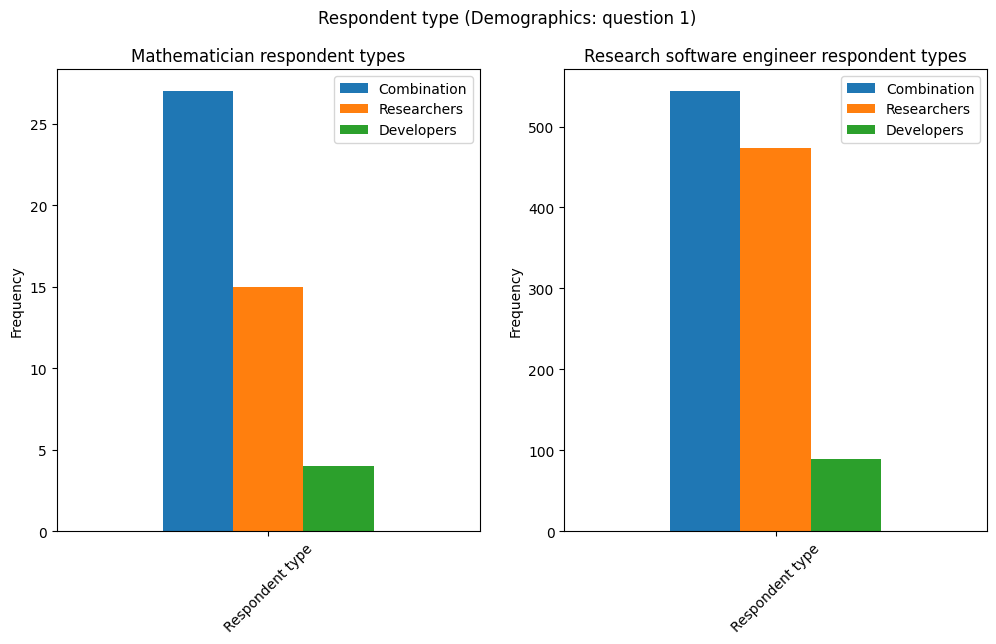

In [3]:
# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, counts):
    totals = [0] * len(questions)
    for category in Answer_types:
        for q in range(len(questions)):
            totals[q] += counts[category][q]

    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts().get(category, 0) * (1 / totals[i]) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Respondent type', survey["Q0.1"][2:])]

# possible text answers
Answer_types = [
    'Combination',
    'Researchers',
    'Developers']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Respondent type (Demographics: question 1)')

ax1 = df1.plot.bar(rot=0, ax=ax1)
ax1.set_title('Mathematician respondent types')
ax1.set_ylabel('Frequency')
ax1.tick_params('x',labelrotation=45)
#ax1.set_yticks(np.arange(0, 100.1, 10))

ax2 = df2.plot.bar(rot=0, ax=ax2)
ax2.set_title('Research software engineer respondent types')
ax2.set_ylabel('Frequency')
ax2.tick_params('x',labelrotation=45)
#ax2.set_yticks(np.arange(0, 100.1, 10))

# edit parameters
plt.gcf().set_size_inches(12, 6)
plt.show()

#### RQ1: What activities do research software developers spend their time on, and how does this impact the perceived quality and long-term accessibility of research software?

Figure 1: Where respondents spend software time.

ValueError: List of boxplot statistics and `positions` values must have same the length

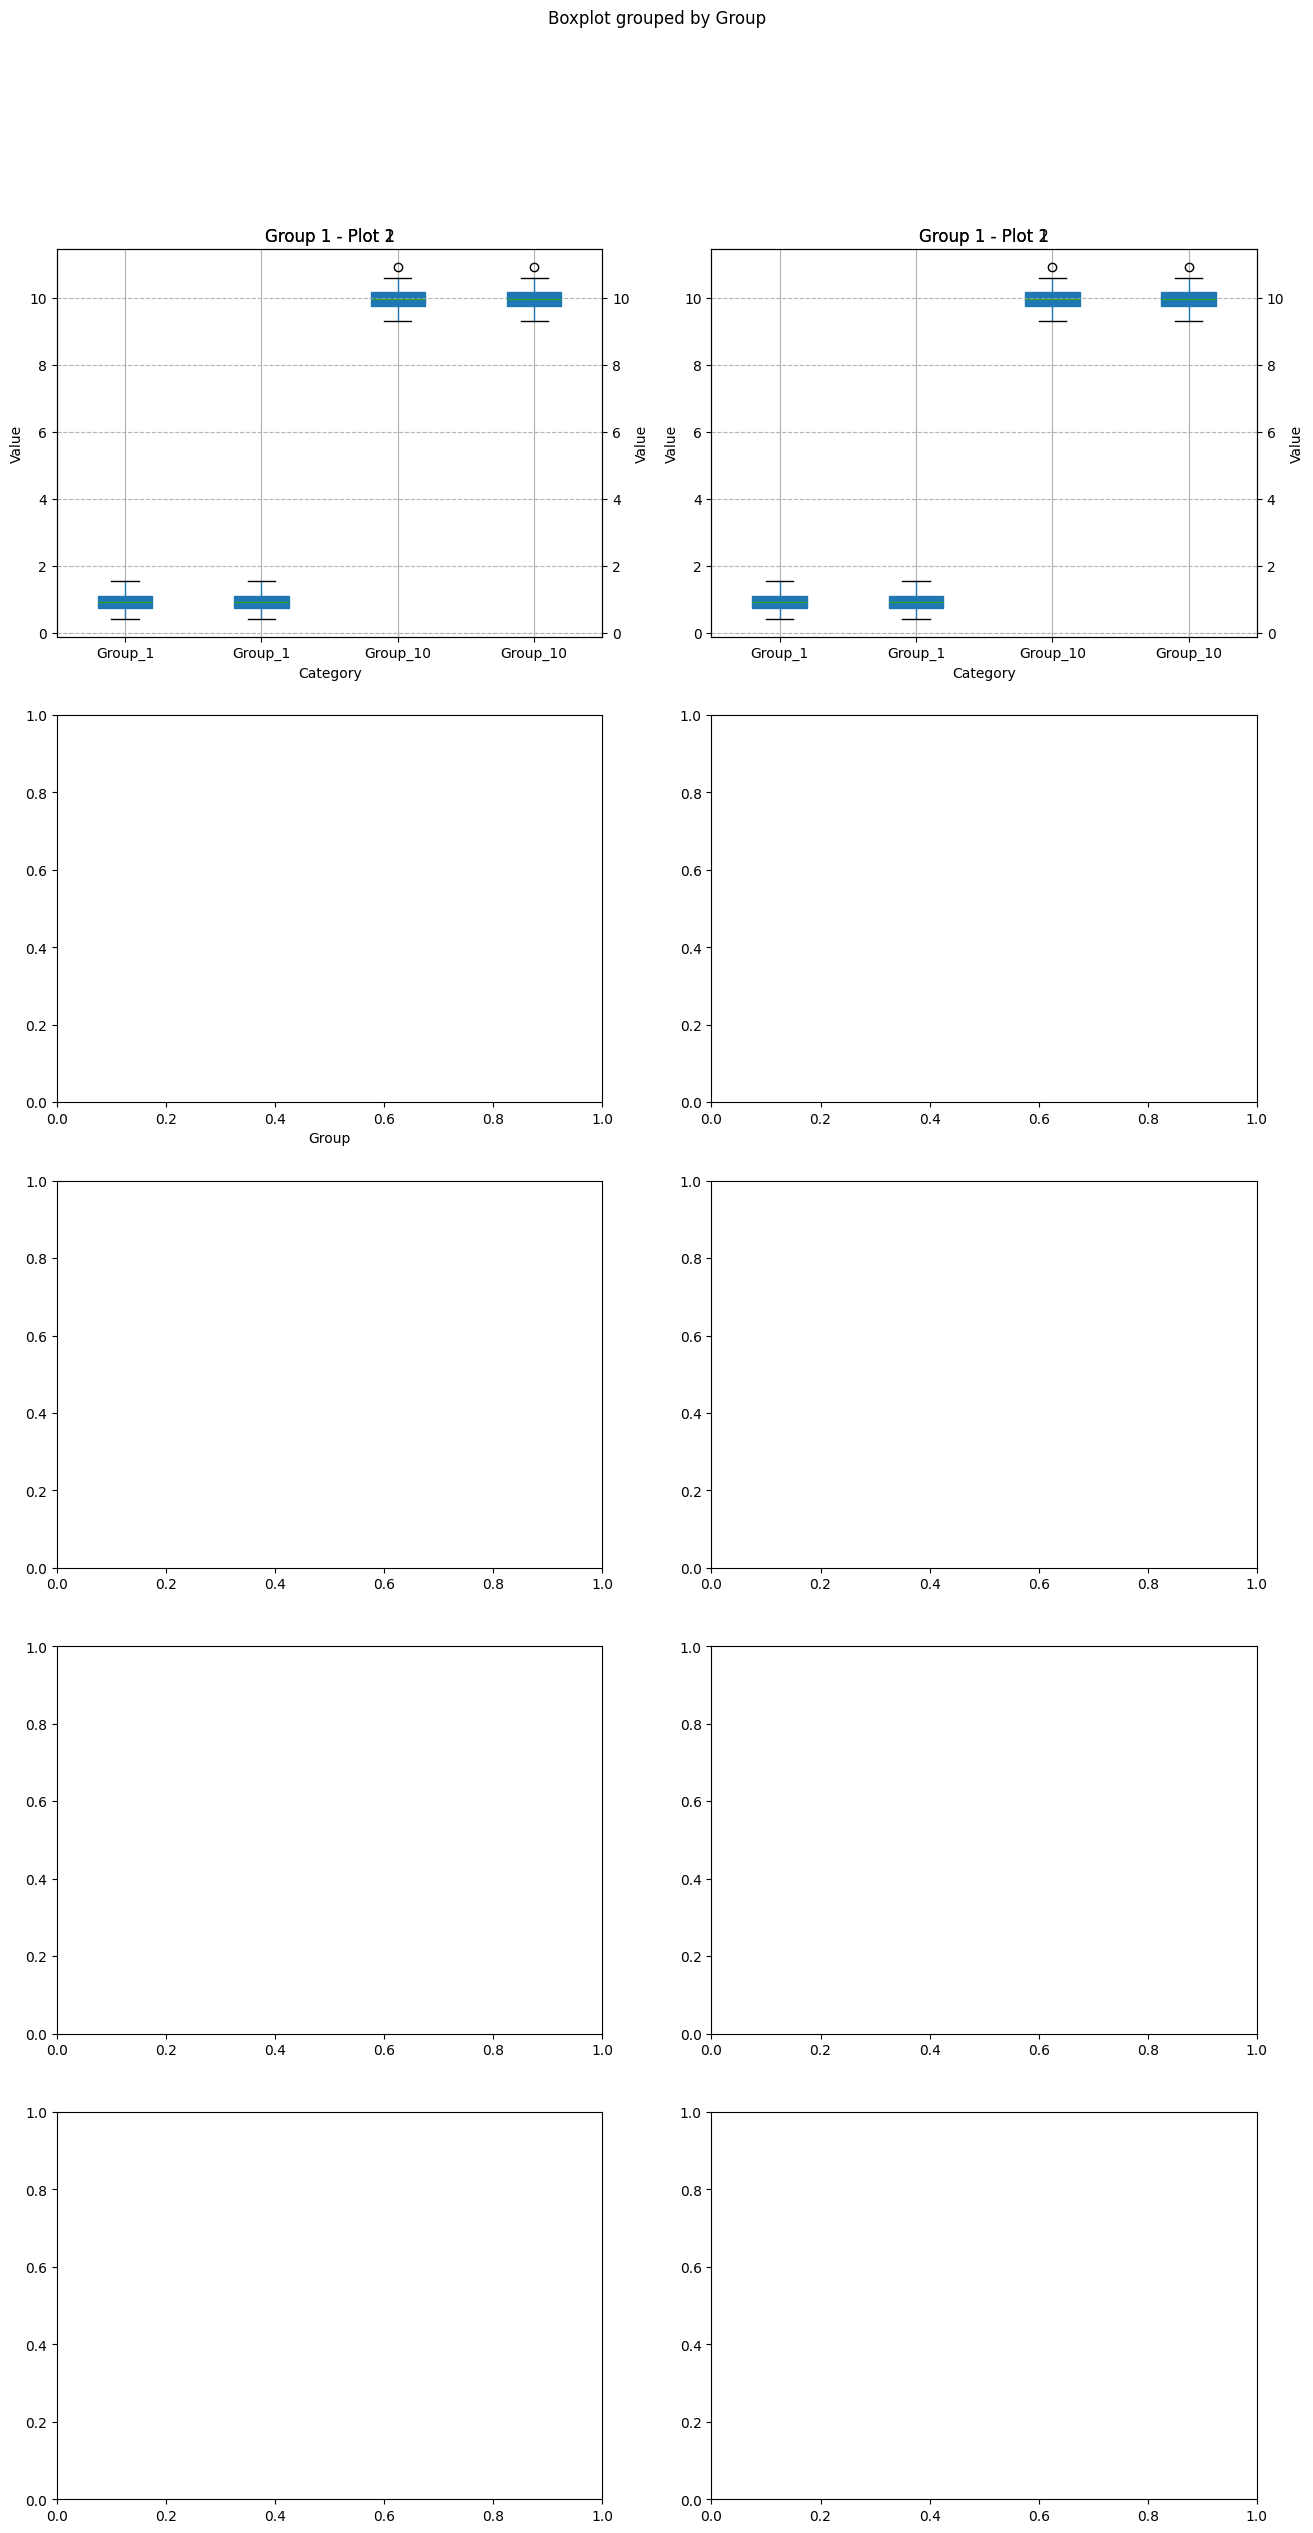

In [ ]:
# Example data generation (replace with actual data)
np.random.seed(42)
data = {
    'Group': [],
    'Value': []
}

for group in range(10):  # Generates 10 groups to demo
    n = 50  # samples per group
    # Generate random values for the group
    data['Group'].extend([f'Group_{group+1}'] * n)
    data['Value'].extend(np.random.normal(group + 1, 0.3, n))

df = pd.DataFrame(data)

# Create a figure with a 5x2 grid of box plots (each cell has two subplots)
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
plt.tight_layout(pad=5)  # Adjust padding to prevent overlapping

# Iterate through each row in the grid
for i in range(5):
    for j in range(2):
        # Each cell contains two box plots side by side
        
        # First subplot (left)
        ax = axes[i, j]
        subset = df[df['Group'].str.contains(f'Group_{i+1}')]
        
        # Create the first box plot
        bp = subset.boxplot('Value', by='Group', 
                            positions=[0.5, 2.5],
                            widths=0.4,
                            patch_artist=True,
                            ax=ax)
        
        # Customization for the first box plot
        ax.set_title(f'Group {i+1} - Plot 1')
        ax.set_xlabel('Category')
        ax.set_ylabel('Value')
        ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        
        
        # Second subplot (right) within the same cell
        ax2 = ax.twinx()
        
        # Create the second box plot
        subset2 = df[df['Group'].str.contains(f'Group_{i+1}')]
        bp2 = subset2.boxplot('Value', by='Group',
                              positions=[1.5, 3.5],
                              widths=0.4,
                              patch_artist=True,
                              ax=ax2)
        
        # Customization for the second box plot
        ax2.set_title(f'Group {i+1} - Plot 2')
        ax2.set_xlabel('Category')
        ax2.set_ylabel('Value')
        ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
        
        
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

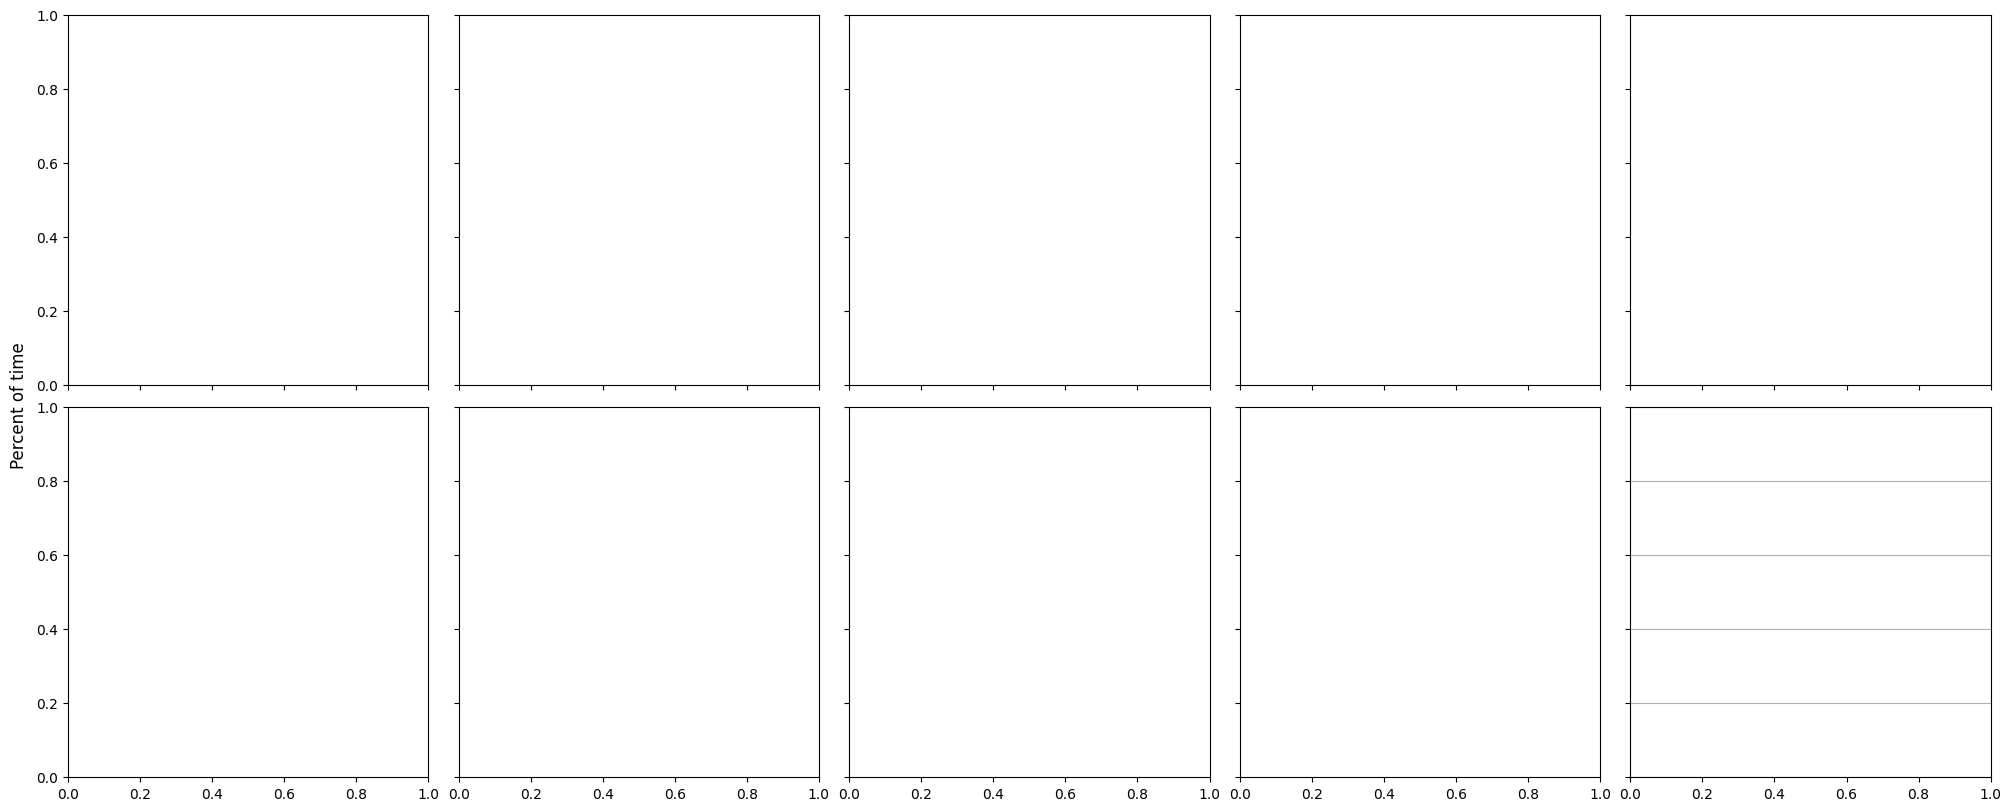

In [4]:
# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Requirements gathering / documentation',  survey["Q1.2_1"][2:]), 
            ('Software architecture / design',          survey["Q1.2_2"][2:]), 
            ('Coding',                                  survey["Q1.2_3"][2:]), 
            ('Testing',                                 survey["Q1.2_4"][2:]), 
            ('Debugging',                               survey["Q1.2_5"][2:]), 
            ('Maintenance',                             survey["Q1.2_6"][2:]), 
            ('Documentation',                           survey["Q1.2_7"][2:]), 
            ('Meetings',                                survey["Q1.2_8"][2:]), 
            ('Training',                                survey["Q1.2_9"][2:]), 
            ('Other',                                   survey["Q1.2_10"][2:]), 

            ('Requirements gathering / documentation',  survey["Q1.3_1"][2:]), 
            ('Software architecture / design',          survey["Q1.3_2"][2:]), 
            ('Coding',                                  survey["Q1.3_3"][2:]), 
            ('Testing',                                 survey["Q1.3_4"][2:]), 
            ('Debugging',                               survey["Q1.3_5"][2:]), 
            ('Maintenance',                             survey["Q1.3_6"][2:]), 
            ('Documentation',                           survey["Q1.3_7"][2:]), 
            ('Meetings',                                survey["Q1.3_8"][2:]), 
            ('Training',                                survey["Q1.3_9"][2:]), 
            ('Other',                                   survey["Q1.3_10"][2:])]

fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, layout='constrained')
#for ax in axs.flat:
#fig.subplots_adjust(hspace=0)
fig.supylabel('Percent of time')
plt.grid(visible=None, which='both', axis='y')
plt.gcf().set_size_inches(20, 8)
plt.show()



Figure 3: Use of testing (Question 1.4)

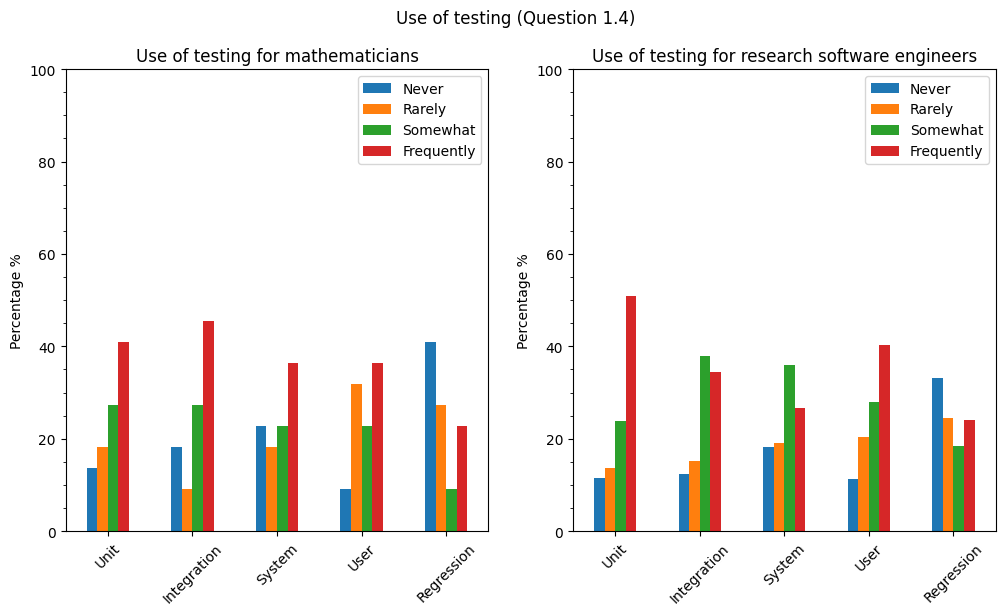

In [6]:
# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, counts):
    totals = [0] * len(questions)
    for category in Answer_types:
        for q in range(len(questions)):
            totals[q] += counts[category][q]

    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts().get(category, 0) * (1 / totals[i]) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Unit',            survey["Q1.4_1"][2:]), 
            ('Integration',     survey["Q1.4_2"][2:]), 
            ('System',          survey["Q1.4_3"][2:]), 
            ('User',            survey["Q1.4_4"][2:]), 
            ('Regression',      survey["Q1.4_5"][2:])]

# possible text answers
Answer_types = [
    'Never',
    'Rarely',
    'Somewhat',
    'Frequently']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Use of testing (Question 1.4)')

ax1 = df1.plot.bar(rot=0, ax=ax1)
ax1.set_title('Use of testing for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)

ax2 = df2.plot.bar(rot=0, ax=ax2)
ax2.set_title('Use of testing for research software engineers')
ax2.set_ylabel('Percentage %')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
plt.gcf().set_size_inches(12, 6)
plt.show()

Figure 4: Availability of tool support. (Question 2.2)

IRSEM: 

Requirements Q2.2_1
Moderately supported    9
Slightly supported      6
Very supported          2
Not supported at all    2
Extremely supported     1
Name: count, dtype: int64 

SW Arch/Design Q2.2_2
Moderately supported    7
Slightly supported      6
Very supported          5
Not supported at all    2
Name: count, dtype: int64 

Coding Q2.2_3
Extremely supported     11
Very supported           6
Moderately supported     2
Slightly supported       1
Name: count, dtype: int64 

Testing Q2.2_4
Very supported          8
Moderately supported    5
Slightly supported      4
Extremely supported     2
Not supported at all    1
Name: count, dtype: int64 

Debugging Q2.2_5
Moderately supported    10
Very supported           5
Slightly supported       3
Extremely supported      2
Name: count, dtype: int64 

Maintenance Q2.2_6
Moderately supported    8
Slightly supported      8
Very supported          3
Extremely supported     1
Name: count, dtype: int64 

Documentation Q2.2_7
Moderately 

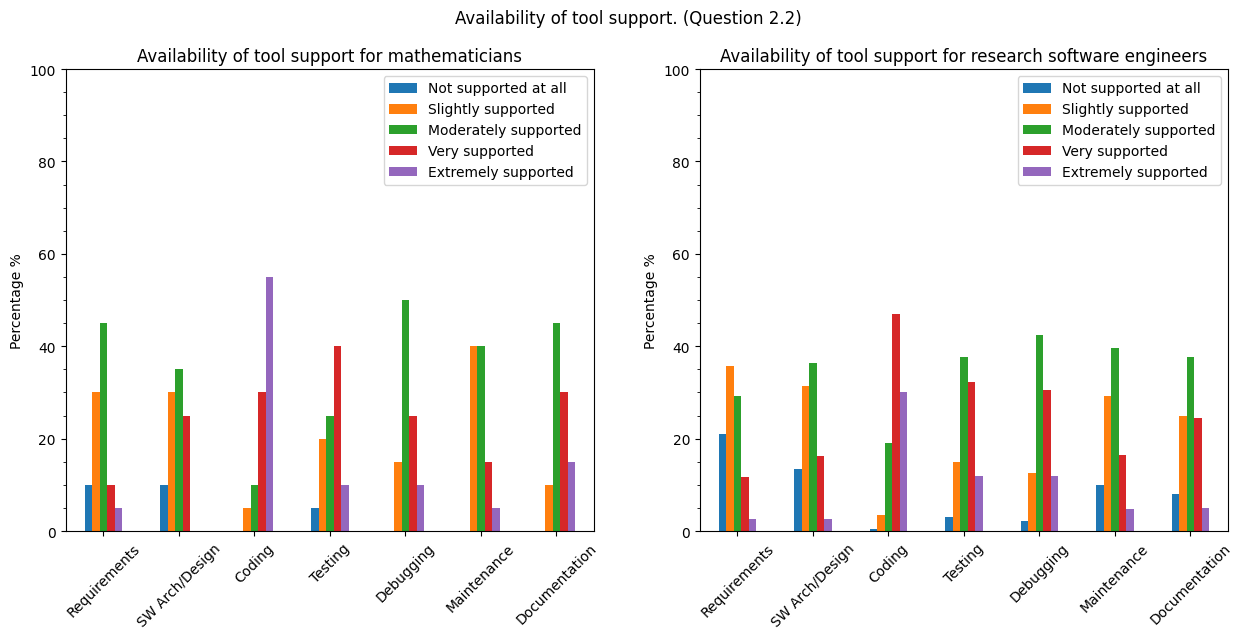

In [7]:

# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, counts):
    totals = [0] * len(questions)
    for category in Answer_types:
        for q in range(len(questions)):
            totals[q] += counts[category][q]

    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts().get(category, 0) * (1 / totals[i]) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES

def print_question_counts(questions, surveyname):
    print(surveyname + ": \n")
    for label, data in questions:
        print(label, data.value_counts(), "\n")
    return 0

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Requirements',            survey["Q2.2_1"][2:]), 
            ('SW Arch/Design',          survey["Q2.2_2"][2:]), 
            ('Coding',                  survey["Q2.2_3"][2:]), 
            ('Testing',                 survey["Q2.2_4"][2:]), 
            ('Debugging',               survey["Q2.2_5"][2:]), 
            ('Maintenance',             survey["Q2.2_6"][2:]), 
            ('Documentation',           survey["Q2.2_7"][2:])]

# possible text answers
Answer_types = [
    'Not supported at all',
    'Slightly supported',
    'Moderately supported',
    'Very supported', 
    'Extremely supported']

QUESTIONS = set_questions(IRSEM)
print_question_counts(QUESTIONS, "IRSEM")

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)
print_question_counts(QUESTIONS, "URSSI")

df2 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Availability of tool support. (Question 2.2)')

ax1 = df1.plot.bar(rot=0, ax=ax1)
ax1.set_title('Availability of tool support for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)

ax2 = df2.plot.bar(rot=0, ax=ax2)
ax2.set_title('Availability of tool support for research software engineers')
ax2.set_ylabel('Percentage %')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
#plt.grid(visible=None, which='both', axis='y')
plt.gcf().set_size_inches(15, 6)
plt.show()
